In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

from pydataset import data
from env import get_connection


# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


from scipy.stats import mannwhitneyu


import acquire
import prepare



In [2]:
df_iris = data('iris')
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [3]:
df_iris.shape

(150, 5)

In [4]:
df_iris.columns.tolist()

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

In [5]:
df_iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [6]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [7]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_google = pd.read_csv(csv_export_url)

In [8]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [9]:
df_google.shape

(891, 12)

In [10]:
df_google.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [11]:
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
df_excel_sample = df_google.head(100)

In [14]:
df_google.shape

(891, 12)

In [15]:

df_google.shape[0]

891

In [16]:
len(df_google.index)

891

In [17]:
df_google[df_google.columns[0]].count()

891

In [18]:
df_excel_sample.columns[:5]

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex'], dtype='object')

In [19]:
df_excel_sample.columns[df_excel_sample.dtypes == object]

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [20]:
df_excel_sample_range = df_excel_sample[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].max() - df_excel_sample[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].min()
df_excel_sample_range

PassengerId     99.000
Survived         1.000
Pclass           2.000
Age             70.170
SibSp            5.000
Parch            5.000
Fare           255.775
dtype: float64

--------
## Data Preparation Exercises

In [21]:
import acquire

### Using the Iris Data:

- Use the function defined in acquire.py to load the iris data.

- Drop the species_id and measurement_id columns.

- Rename the species_name column to just species.

- Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).

- Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [22]:
# grab data using acquire module's function get_iris_data()
iris_df = acquire.get_iris_data()

In [23]:
# check top 5 contents of dataframe 
iris_df.head()

,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,setosa,2,4.9,3.0,1.4,0.2
2,1,setosa,3,4.7,3.2,1.3,0.2
3,1,setosa,4,4.6,3.1,1.5,0.2
4,1,setosa,5,5.0,3.6,1.4,0.2


In [24]:
# print rows and columns
iris_df.shape

(150, 7)

In [25]:
# check data's information
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species_id      150 non-null    int64  
 1   species_name    150 non-null    object 
 2   measurement_id  150 non-null    int64  
 3   sepal_length    150 non-null    float64
 4   sepal_width     150 non-null    float64
 5   petal_length    150 non-null    float64
 6   petal_width     150 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 8.3+ KB


In [26]:
# check for null
iris_df.isna().sum()

species_id        0
species_name      0
measurement_id    0
sepal_length      0
sepal_width       0
petal_length      0
petal_width       0
dtype: int64

In [27]:
# drop unnecssay, or duplicated columns
iris_df.drop(columns = ['species_id', 'measurement_id'], inplace=True)

In [28]:
# check if columns are dropped
iris_df.head()

,species_name,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


In [29]:
#rename column name from  species_name to species
iris_df.rename(columns={'species_name': 'species'}, inplace=True)

In [30]:
# check if column name is changed
iris_df.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


In [31]:
# use pd.get_dummies to get encoded version
dummies = pd.get_dummies(iris_df['species'])
dummies.head()

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [32]:
# use drop_first to drop reptative information
dummies = pd.get_dummies(iris_df['species'], drop_first=True)
dummies.head()

,versicolor,virginica
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [33]:
# use pd.concat to add dummies to original dataframe
# use axis= 1 to add dummies to columns in original dataframe
iris_df = pd.concat([iris_df, dummies], axis=1)

In [34]:
# Check if dummies are added in orignal dataframe
iris_df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0


In [35]:
# create function to accepts the untransformed dataframe and return the transformed data
def prep_iris(df):
    df.drop(columns = ['species_id', 'measurement_id'], inplace=True)
    df.rename(columns={'species_name': 'species'}, inplace=True)
    dummies = pd.get_dummies(iris_df['species'], drop_first=True)
    df = pd.concat([df, dummies], axis=1)
    return df

In [36]:
# get original iris dataframe
test_iris = acquire.get_iris_data()
test_iris.head()

,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,setosa,2,4.9,3.0,1.4,0.2
2,1,setosa,3,4.7,3.2,1.3,0.2
3,1,setosa,4,4.6,3.1,1.5,0.2
4,1,setosa,5,5.0,3.6,1.4,0.2


In [37]:
# use function to accept original dataframe and return the trandformed dataframe
clean_iris = prep_iris(test_iris)
clean_iris.head()

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0


### Using the Titanic dataset

- Use the function defined in acquire.py to load the Titanic data.

- Drop any unnecessary, unhelpful, or duplicated columns.

- Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

- Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [38]:
titanic_df = acquire.get_titanic_data()

In [39]:
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [40]:
titanic_df.shape

(891, 13)

In [41]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [42]:
titanic_df.isna().sum()

passenger_id      0
survived          0
pclass            0
sex               0
age             177
sibsp             0
parch             0
fare              0
embarked          2
class             0
deck            688
embark_town       2
alone             0
dtype: int64

In [43]:
titanic_df.drop(columns = ['class', 'embarked','deck', 'passenger_id', 'age'], inplace=True )

In [44]:
titanic_df.head()

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
0,0,3,male,1,0,7.2500,Southampton,0
1,1,1,female,1,0,71.2833,Cherbourg,0
2,1,3,female,0,0,7.9250,Southampton,1
3,1,1,female,1,0,53.1000,Southampton,0
4,0,3,male,0,0,8.0500,Southampton,1


In [45]:
titanic_df['embark_town'].fillna('Southampton', inplace=True)

In [46]:
dummies = pd.get_dummies(titanic_df[['sex', 'embark_town']], drop_first=True)
dummies

,sex_male,embark_town_Queenstown,embark_town_Southampton
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1
...,...,...,...
886,1,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [47]:
titanic_df = pd.concat([titanic_df, dummies],axis=1)
titanic_df

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,0,3,male,0,0,8.0500,Southampton,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Southampton,1,1,0,1
887,1,1,female,0,0,30.0000,Southampton,1,0,0,1
888,0,3,female,1,2,23.4500,Southampton,0,0,0,1
889,1,1,male,0,0,30.0000,Cherbourg,1,1,0,0


In [48]:
titanic_df.isna().sum()

survived                   0
pclass                     0
sex                        0
sibsp                      0
parch                      0
fare                       0
embark_town                0
alone                      0
sex_male                   0
embark_town_Queenstown     0
embark_town_Southampton    0
dtype: int64

In [49]:
def prep_titanic(df):
    
    df.drop(columns = ['class', 'embarked','deck', 'passenger_id', 'age'], inplace=True )
    
    df['embark_town'].fillna('Southampton', inplace=True)
    
    dummies = pd.get_dummies(df[['sex', 'embark_town']], drop_first=True)
    
    df = pd.concat([df, dummies],axis=1)

    return df

In [50]:
test_titanic = acquire.get_titanic_data()
test_titanic

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [51]:
clean_titanic = prep_titanic(test_titanic)
clean_titanic

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,0,3,male,0,0,8.0500,Southampton,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Southampton,1,1,0,1
887,1,1,female,0,0,30.0000,Southampton,1,0,0,1
888,0,3,female,1,2,23.4500,Southampton,0,0,0,1
889,1,1,male,0,0,30.0000,Cherbourg,1,1,0,0


### Using the Telco dataset

- Use the function defined in acquire.py to load the Telco data.

- Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

- Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

- Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [52]:
telco_df = acquire.get_telco_data()

In [53]:
telco_df.head()

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,2,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,DSL,One year,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,DSL,Month-to-month,Mailed check
2,1,1,2,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Fiber optic,Month-to-month,Electronic check
3,1,1,2,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Fiber optic,Month-to-month,Electronic check
4,2,1,2,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Fiber optic,Month-to-month,Mailed check


In [54]:
telco_df.shape

(7043, 24)

In [55]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   contract_type_id          7043 non-null   int64  
 2   internet_service_type_id  7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [56]:
telco_df.total_charges.value_counts()

           11
20.2       11
19.75       9
19.9        8
20.05       8
           ..
2387.75     1
6302.8      1
2058.5      1
829.55      1
3707.6      1
Name: total_charges, Length: 6531, dtype: int64

In [57]:
telco_df.total_charges = telco_df.total_charges.str.replace(' ', '0').astype(float)

In [58]:
telco_df.total_charges.value_counts()

0.00       11
20.20      11
19.75       9
19.90       8
20.05       8
           ..
2387.75     1
6302.80     1
2058.50     1
829.55      1
3707.60     1
Name: total_charges, Length: 6531, dtype: int64

In [59]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   contract_type_id          7043 non-null   int64  
 2   internet_service_type_id  7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [60]:
to_drop = ['payment_type_id', 'contract_type_id', 'internet_service_type_id','customer_id' ]

In [61]:
telco_df.drop(columns = to_drop, inplace=True)

In [62]:
telco_df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.30,No,DSL,One year,Mailed check
1,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.40,No,DSL,Month-to-month,Mailed check
2,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Fiber optic,Month-to-month,Electronic check
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Fiber optic,Month-to-month,Electronic check
4,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.40,Yes,Fiber optic,Month-to-month,Mailed check


In [63]:
to_dummies = ['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'churn', 'internet_service_type', 'contract_type', 'payment_type']

In [64]:
dummies = pd.get_dummies(telco_df[to_dummies],drop_first=True)
dummies

,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,internet_service_type_Fiber optic,internet_service_type_None,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,1,1,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
1,1,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1,0,0,1,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,1,0
3,1,1,0,1,0,0,0,0,0,1,...,1,1,1,1,0,0,0,0,1,0
4,0,1,0,1,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
7039,1,1,0,1,0,1,0,0,0,0,...,1,1,1,1,0,0,0,0,1,0
7040,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
7041,1,1,1,1,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,1


In [65]:
telco_df = pd.concat([telco_df, dummies], axis=1)

In [66]:
telco_df

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,internet_service_type_Fiber optic,internet_service_type_None,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,...,0,1,0,0,0,1,0,0,0,1
1,Male,0,No,No,9,Yes,Yes,No,No,No,...,1,0,0,0,0,0,0,0,0,1
2,Male,0,No,No,4,Yes,No,No,No,Yes,...,0,1,1,1,0,0,0,0,1,0
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,...,1,1,1,1,0,0,0,0,1,0
4,Female,1,Yes,No,3,Yes,No,No,No,No,...,0,1,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,0,No,No,13,Yes,No,Yes,No,No,...,0,0,0,0,0,1,0,0,0,1
7039,Male,0,Yes,No,22,Yes,Yes,No,No,No,...,1,1,1,1,0,0,0,0,1,0
7040,Male,0,No,No,2,Yes,No,No,Yes,No,...,0,1,0,0,0,0,0,0,0,1
7041,Male,0,Yes,Yes,67,Yes,No,Yes,No,Yes,...,1,0,0,0,0,0,1,0,0,1


In [67]:
def prep_telco(df):
    to_drop = ['payment_type_id', 'contract_type_id', 'internet_service_type_id','customer_id' ] 
    
    df.total_charges = df.total_charges.str.replace(' ', '0').astype(float)
    
    df.drop(columns = to_drop, inplace=True)
    
    to_dummies = ['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'churn', 'internet_service_type', 'contract_type', 'payment_type']
    dummies = pd.get_dummies(df[to_dummies],drop_first=True)
    
    df = pd.concat([df, dummies],axis=1)

    return df

In [68]:
test_telco = acquire.get_telco_data()
test_telco

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,2,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.60,593.3,No,DSL,One year,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.90,542.4,No,DSL,Month-to-month,Mailed check
2,1,1,2,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.90,280.85,Yes,Fiber optic,Month-to-month,Electronic check
3,1,1,2,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Fiber optic,Month-to-month,Electronic check
4,2,1,2,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Fiber optic,Month-to-month,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,2,1,9987-LUTYD,Female,0,No,No,13,Yes,...,Yes,No,No,No,55.15,742.9,No,DSL,One year,Mailed check
7039,1,1,2,9992-RRAMN,Male,0,Yes,No,22,Yes,...,No,No,Yes,Yes,85.10,1873.7,Yes,Fiber optic,Month-to-month,Electronic check
7040,2,1,1,9992-UJOEL,Male,0,No,No,2,Yes,...,No,No,No,Yes,50.30,92.75,No,DSL,Month-to-month,Mailed check
7041,2,3,1,9993-LHIEB,Male,0,Yes,Yes,67,Yes,...,Yes,No,Yes,No,67.85,4627.65,No,DSL,Two year,Mailed check


In [69]:
test_telco.total_charges.value_counts()

           11
20.2       11
19.75       9
19.9        8
20.05       8
           ..
2387.75     1
6302.8      1
2058.5      1
829.55      1
3707.6      1
Name: total_charges, Length: 6531, dtype: int64

In [70]:
clean_telco = prep_telco(test_telco)
clean_telco

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,internet_service_type_Fiber optic,internet_service_type_None,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,...,0,1,0,0,0,1,0,0,0,1
1,Male,0,No,No,9,Yes,Yes,No,No,No,...,1,0,0,0,0,0,0,0,0,1
2,Male,0,No,No,4,Yes,No,No,No,Yes,...,0,1,1,1,0,0,0,0,1,0
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,...,1,1,1,1,0,0,0,0,1,0
4,Female,1,Yes,No,3,Yes,No,No,No,No,...,0,1,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,0,No,No,13,Yes,No,Yes,No,No,...,0,0,0,0,0,1,0,0,0,1
7039,Male,0,Yes,No,22,Yes,Yes,No,No,No,...,1,1,1,1,0,0,0,0,1,0
7040,Male,0,No,No,2,Yes,No,No,Yes,No,...,0,1,0,0,0,0,0,0,0,1
7041,Male,0,Yes,Yes,67,Yes,No,Yes,No,Yes,...,1,0,0,0,0,0,1,0,0,1


### Split your data

- 1. Write a function to split your data into train, test and validate datasets. Add this function to prepare.py.

- 2. Run the function in your notebook on the Iris dataset, returning 3 datasets, train_iris, validate_iris and test_iris.

- 3. Run the function on the Titanic dataset, returning 3 datasets, train_titanic, validate_titanic and test_titanic.

- 4. Run the function on the Telco dataset, returning 3 datasets, train_telco, validate_telco and test_telco.

In [71]:
def train_validate_test_split(df, target, seed=42):
    
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [72]:
iris_train, iris_validate, iris_test = train_validate_test_split(iris_df, target='species')
iris_train.shape, iris_validate.shape, iris_test.shape

((84, 7), (36, 7), (30, 7))

In [73]:
titanic_train, titanic_validate, titanic_test = train_validate_test_split(titanic_df, target='survived')
titanic_train.shape, titanic_validate.shape, titanic_test.shape

((498, 11), (214, 11), (179, 11))

In [74]:
telco_train, telco_validate, telco_test = train_validate_test_split(telco_df, target='churn')
telco_train.shape, telco_validate.shape, telco_test.shape

((3943, 47), (1691, 47), (1409, 47))

-----
## Exploratory Analysis 

- Part 1

In [75]:
iris = acquire.get_iris_data()
iris.head()

,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,setosa,2,4.9,3.0,1.4,0.2
2,1,setosa,3,4.7,3.2,1.3,0.2
3,1,setosa,4,4.6,3.1,1.5,0.2
4,1,setosa,5,5.0,3.6,1.4,0.2


In [76]:
clean_iris = prepare.prep_iris(iris)
clean_iris.head()

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0


In [77]:
train_iris, validate_iris, test_iris = prepare.train_validate_test_split(clean_iris, 'species')

In [78]:
train_iris.shape, validate_iris.shape, test_iris.shape

((84, 7), (36, 7), (30, 7))

In [79]:
train_iris.head()

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
131,virginica,7.9,3.8,6.4,2.0,0,1
59,versicolor,5.2,2.7,3.9,1.4,1,0
108,virginica,6.7,2.5,5.8,1.8,0,1
82,versicolor,5.8,2.7,3.9,1.2,1,0
40,setosa,5.0,3.5,1.3,0.3,0,0


In [80]:
train_iris.describe(include ='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
species,84,3,virginica,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sepal_length,84.0,NaN,NaN,NaN,5.846429,0.872808,4.3,5.1,5.75,6.4,7.9
sepal_width,84.0,NaN,NaN,NaN,3.010714,0.413046,2.0,2.8,3.0,3.2,3.9
petal_length,84.0,NaN,NaN,NaN,3.759524,1.777647,1.1,1.575,4.25,5.1,6.9
petal_width,84.0,NaN,NaN,NaN,1.196429,0.760698,0.1,0.3,1.3,1.825,2.5
versicolor,84.0,NaN,NaN,NaN,0.333333,0.474236,0.0,0.0,0.0,1.0,1.0
virginica,84.0,NaN,NaN,NaN,0.333333,0.474236,0.0,0.0,0.0,1.0,1.0


In [81]:
train_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 131 to 65
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   species       84 non-null     object 
 1   sepal_length  84 non-null     float64
 2   sepal_width   84 non-null     float64
 3   petal_length  84 non-null     float64
 4   petal_width   84 non-null     float64
 5   versicolor    84 non-null     uint8  
 6   virginica     84 non-null     uint8  
dtypes: float64(4), object(1), uint8(2)
memory usage: 4.1+ KB


### 2. Univariate Stats

- For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

- For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

- Document takeaways & any actions.

In [82]:
# identify and separate numerical and categorical variable
# num_vars = train_iris.select_dtypes(exclude='object')
num_vars = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
cat_vars = ['species']
# cat_vars = train_iris.select_dtypes(include='object')


In [83]:
# for col in num_vars:
#     print(col)
#     print(train[col].describe())
#     train[col].hist()
#     plt.show()

sepal_length
count    84.000000
mean      5.846429
std       0.872808
min       4.300000
25%       5.100000
50%       5.750000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64


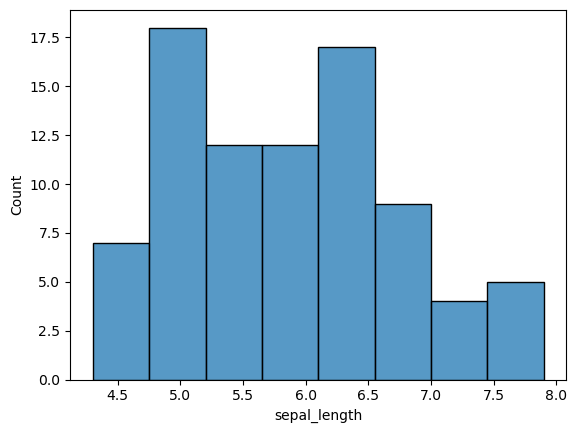

sepal_width
count    84.000000
mean      3.010714
std       0.413046
min       2.000000
25%       2.800000
50%       3.000000
75%       3.200000
max       3.900000
Name: sepal_width, dtype: float64


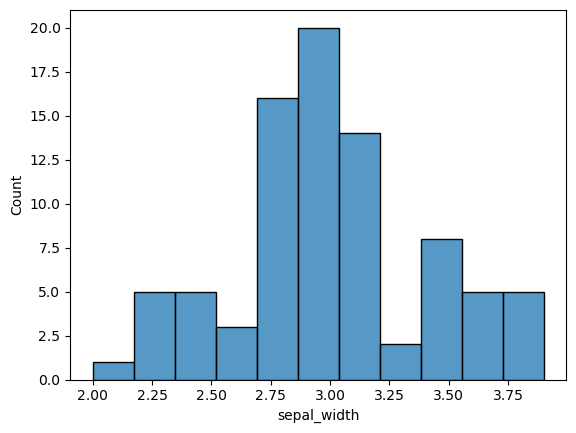

petal_length
count    84.000000
mean      3.759524
std       1.777647
min       1.100000
25%       1.575000
50%       4.250000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64


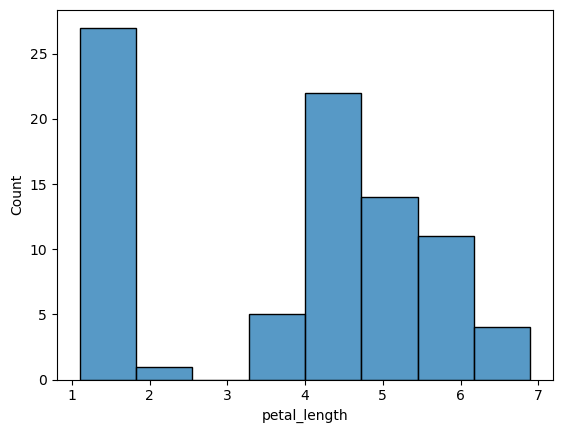

petal_width
count    84.000000
mean      1.196429
std       0.760698
min       0.100000
25%       0.300000
50%       1.300000
75%       1.825000
max       2.500000
Name: petal_width, dtype: float64


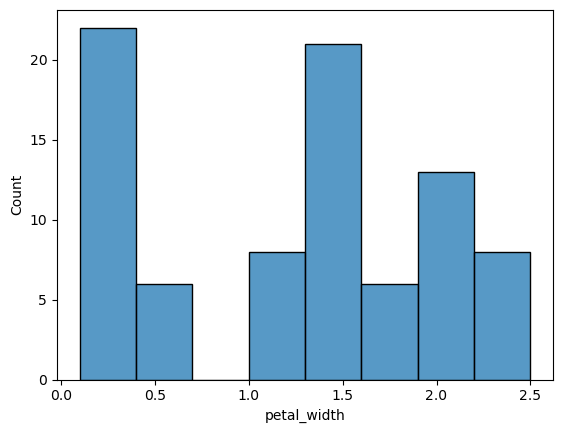

In [84]:
for col in num_vars:
    print(col)
    print(train_iris[col].describe())
    sns.histplot(x =col, data=train_iris)
    
#     sns.boxplot(x=col, data=train_iris)
    
    plt.show()
  

sepal_length
count    84.000000
mean      5.846429
std       0.872808
min       4.300000
25%       5.100000
50%       5.750000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64


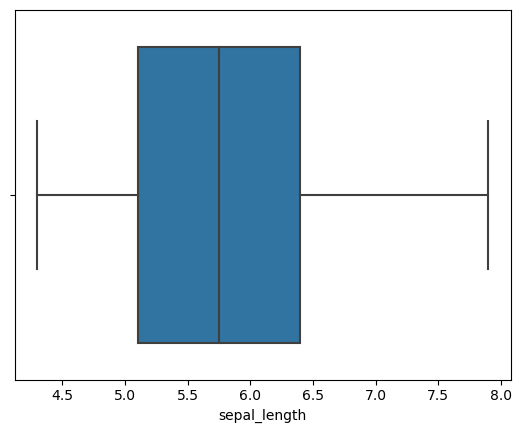

sepal_width
count    84.000000
mean      3.010714
std       0.413046
min       2.000000
25%       2.800000
50%       3.000000
75%       3.200000
max       3.900000
Name: sepal_width, dtype: float64


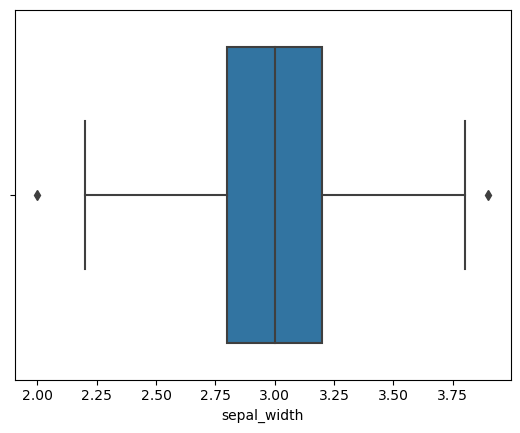

petal_length
count    84.000000
mean      3.759524
std       1.777647
min       1.100000
25%       1.575000
50%       4.250000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64


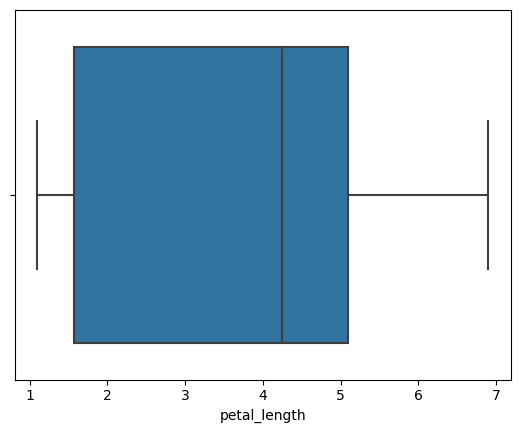

petal_width
count    84.000000
mean      1.196429
std       0.760698
min       0.100000
25%       0.300000
50%       1.300000
75%       1.825000
max       2.500000
Name: petal_width, dtype: float64


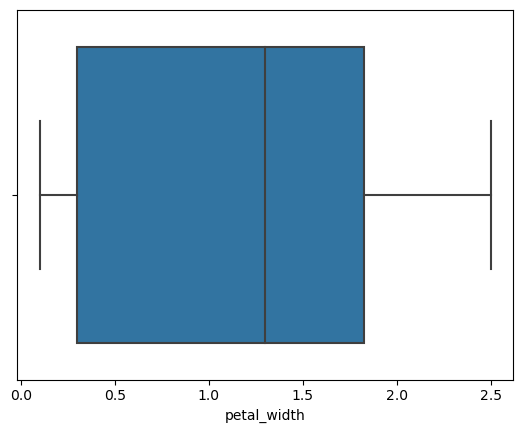

In [85]:
for col in num_vars:
    print(col)
    print(train_iris[col].describe())
    sns.boxplot(x=col, data=train_iris)
    plt.show()

virginica     33.333333
versicolor    33.333333
setosa        33.333333
Name: species, dtype: float64


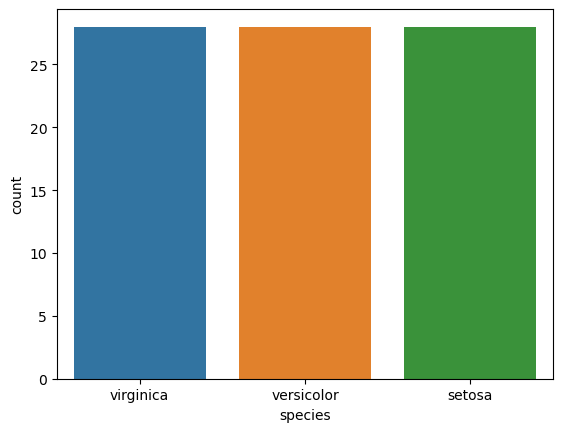

In [86]:
for col in cat_vars:
    print(train_iris[col].value_counts(normalize=True)* 100)
    sns.countplot(x=col, data=train_iris)
    plt.show()
   
   

In [87]:
train_iris.species.value_counts()

virginica     28
versicolor    28
setosa        28
Name: species, dtype: int64

### Takeways:
- sepal length and sepal width are normally distributed

- sepal width has outliers of 2 and 3.9

### 3. Bivariate Stats

- Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

- For each measurement type, compute the descriptive statistics for each species.

sepal_length


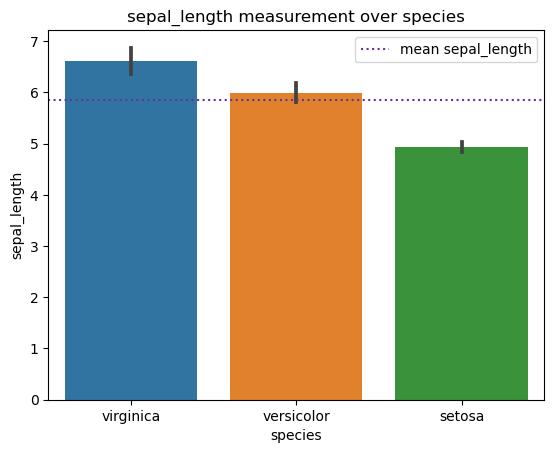

count    84.000000
mean      5.846429
std       0.872808
min       4.300000
25%       5.100000
50%       5.750000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64
sepal_width


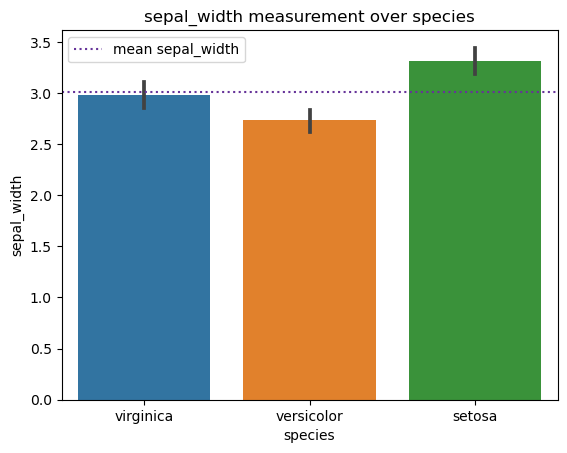

count    84.000000
mean      3.010714
std       0.413046
min       2.000000
25%       2.800000
50%       3.000000
75%       3.200000
max       3.900000
Name: sepal_width, dtype: float64
petal_length


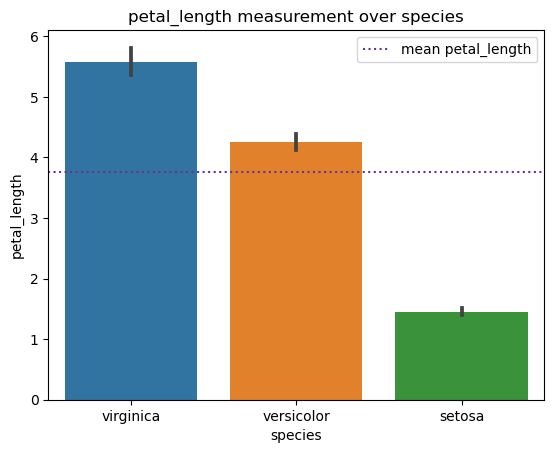

count    84.000000
mean      3.759524
std       1.777647
min       1.100000
25%       1.575000
50%       4.250000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64
petal_width


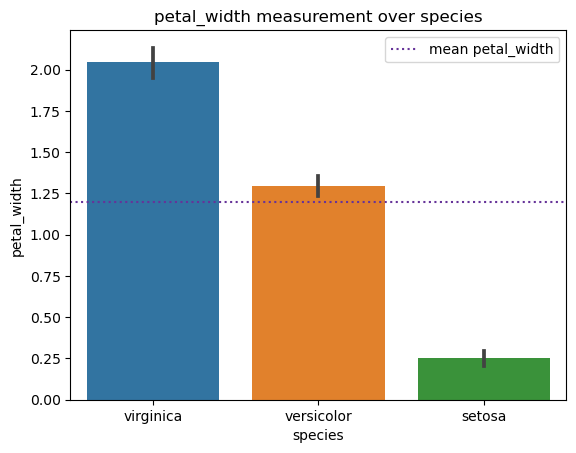

count    84.000000
mean      1.196429
std       0.760698
min       0.100000
25%       0.300000
50%       1.300000
75%       1.825000
max       2.500000
Name: petal_width, dtype: float64


species                setosa  versicolor  virginica
sepal_length count  28.000000   28.000000  28.000000
             mean    4.939286    5.989286   6.610714
             std     0.296072    0.484072   0.734514
             min     4.300000    5.000000   4.900000
             25%     4.775000    5.675000   6.275000
             50%     5.000000    5.900000   6.600000
             75%     5.100000    6.300000   7.125000
             max     5.500000    7.000000   7.900000
sepal_width  count  28.000000   28.000000  28.000000
             mean    3.317857    2.732143   2.982143
             std     0.348599    0.303136   0.363169
             min     2.300000    2.000000   2.500000
             25%     3.100000    2.600000   2.775000
             50%     3.350000    2.800000   3.000000
             75%     3.525000    2.925000   3.200000
             max     3.900000    3.200000   3.800000
petal_length count  28.000000   28.000000  28.000000
             mean    1.453571    4.253571   5.571429
             std     0.162121    0.380528   0.609102
             min     1.100000    3.500000   4.500000
             25%     1.375000    4.000000   5.100000
             50%     1.450000    4.250000   5.550000
             75%     1.525000    4.525000   5.925000
             max     1.900000    4.900000   6.900000
petal_width  count  28.000000   28.000000  28.000000
             mean    0.250000    1.296429   2.042857
             std     0.123228    0.155116   0.239488
             min     0.100000    1.000000   1.500000
             25%     0.200000    1.200000   1.875000
             50%     0.200000    1.300000   2.050000
             75%     0.300000    1.400000   2.225000
             max     0.600000    1.500000   2.500000
versicolor   count  28.000000   28.000000  28.000000
             mean    0.000000    1.000000   0.000000
             std     0.000000    0.000000   0.000000
             min     0.000000    1.000000   0.000000
             25%     0.000000    1.000000   0.000000
             50%     0.000000    1.000000   0.000000
             75%     0.000000    1.000000   0.000000
             max     0.000000    1.000000   0.000000
virginica    count  28.000000   28.000000  28.000000
             mean    0.000000    0.000000   1.000000
             std     0.000000    0.000000   0.000000
             min     0.000000    0.000000   1.000000
             25%     0.000000    0.000000   1.000000
             50%     0.000000    0.000000   1.000000
             75%     0.000000    0.000000   1.000000
             max     0.000000    0.000000   1.000000

In [88]:
for col in num_vars:
    print(col)
    plt.title(f'{col} measurement over species')
    sns.barplot(x="species", y=col, data=train_iris)
    col_mean = train_iris[col].mean()
    plt.axhline(col_mean, label=f'mean {col}', color='rebeccapurple', linestyle='dotted')
    plt.legend()
    plt.show()
    print(train_iris[col].describe())

train_iris.groupby('species').describe().T

### Takeaways: 

- sepal_length: lognest- Virginica, shortest-Setosa

- sepal_width: longest- Setosa, shortest- Versicolor

- petal_length: longest- Virginica, shortest- Setosa

- petal_width: longest- Virginica, shortest- Setosa

- setosa can be easily distinguished by petal length and petal width

#### - For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

#### Hypothesis¶
- $𝐻_{𝑂 }$: mean of petal width of virginica and versicolor is not different

- $𝐻_{𝑎}$ : mean of petal width of virginica and versicolor is different

In [90]:
train_iris.head()

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
131,virginica,7.9,3.8,6.4,2.0,0,1
59,versicolor,5.2,2.7,3.9,1.4,1,0
108,virginica,6.7,2.5,5.8,1.8,0,1
82,versicolor,5.8,2.7,3.9,1.2,1,0
40,setosa,5.0,3.5,1.3,0.3,0,0


In [257]:
train_versicolor = train_iris[train_iris.versicolor==1]
train_versicolor.petal_width.head()

59    1.4
82    1.2
79    1.0
71    1.3
53    1.3
Name: petal_width, dtype: float64

In [258]:
train_virginica = train_iris[train_iris.virginica==1]
train_virginica.petal_width.head()

131    2.0
108    1.8
106    1.7
149    1.8
111    1.9
Name: petal_width, dtype: float64

In [107]:
#set alpha 
alpha = 0.05

In [127]:
stat, p_value = mannwhitneyu(train_virginica.petal_width, train_versicolor.petal_width)
stat, p_value 

(781.5, 1.4587742069536832e-10)

In [128]:
# compare p_value:
if p_value < alpha:
    print("We Rejected Null Hypothesis")
else:
    print("We failed to reject Null Hypothesis")

We Rejected Null Hypothesis


### Takeaways:

- mean of petal width of virginica and versicolor is different

### 4. Multivariate Stats

- Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

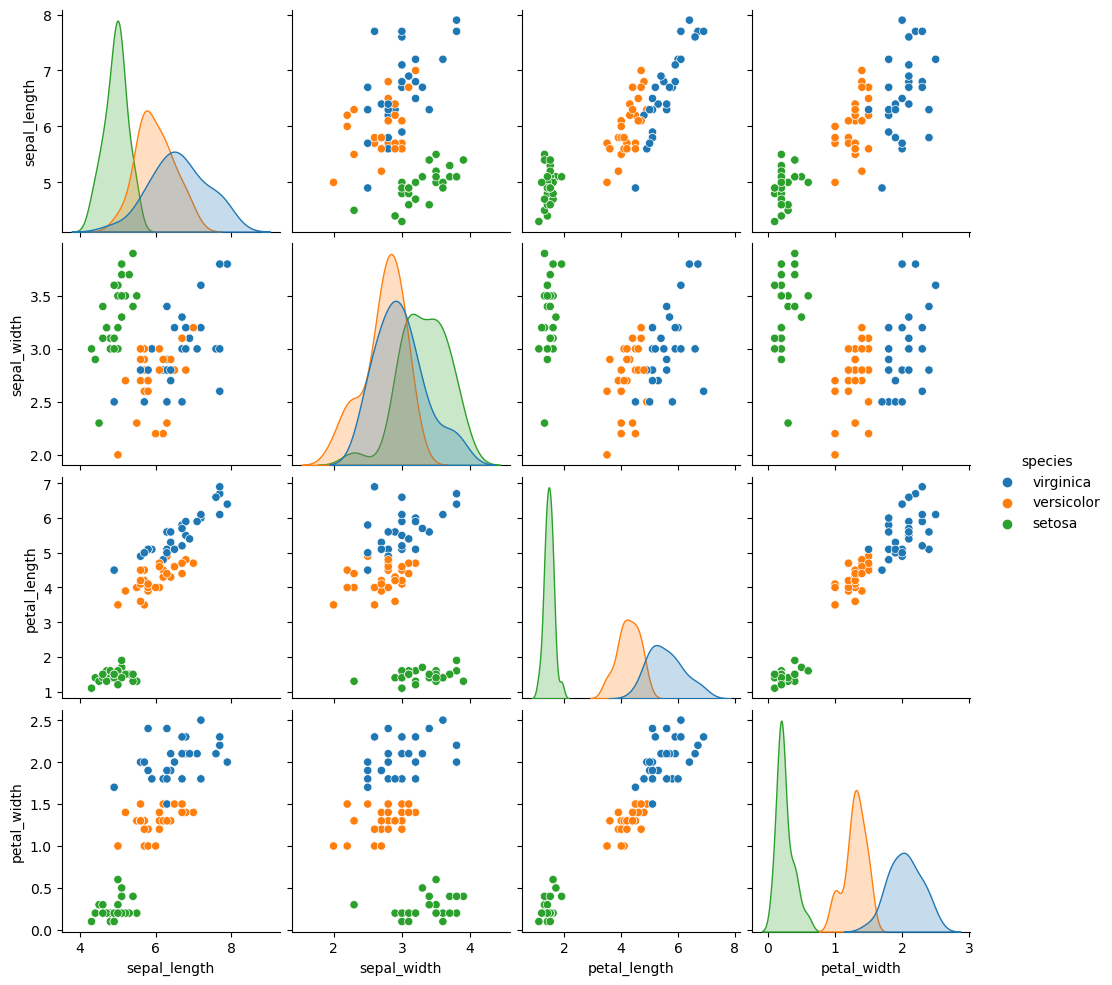

In [158]:
sns.pairplot(train_iris, vars = num_vars, hue='species' )
# sns.pairplot(data =train_iris)

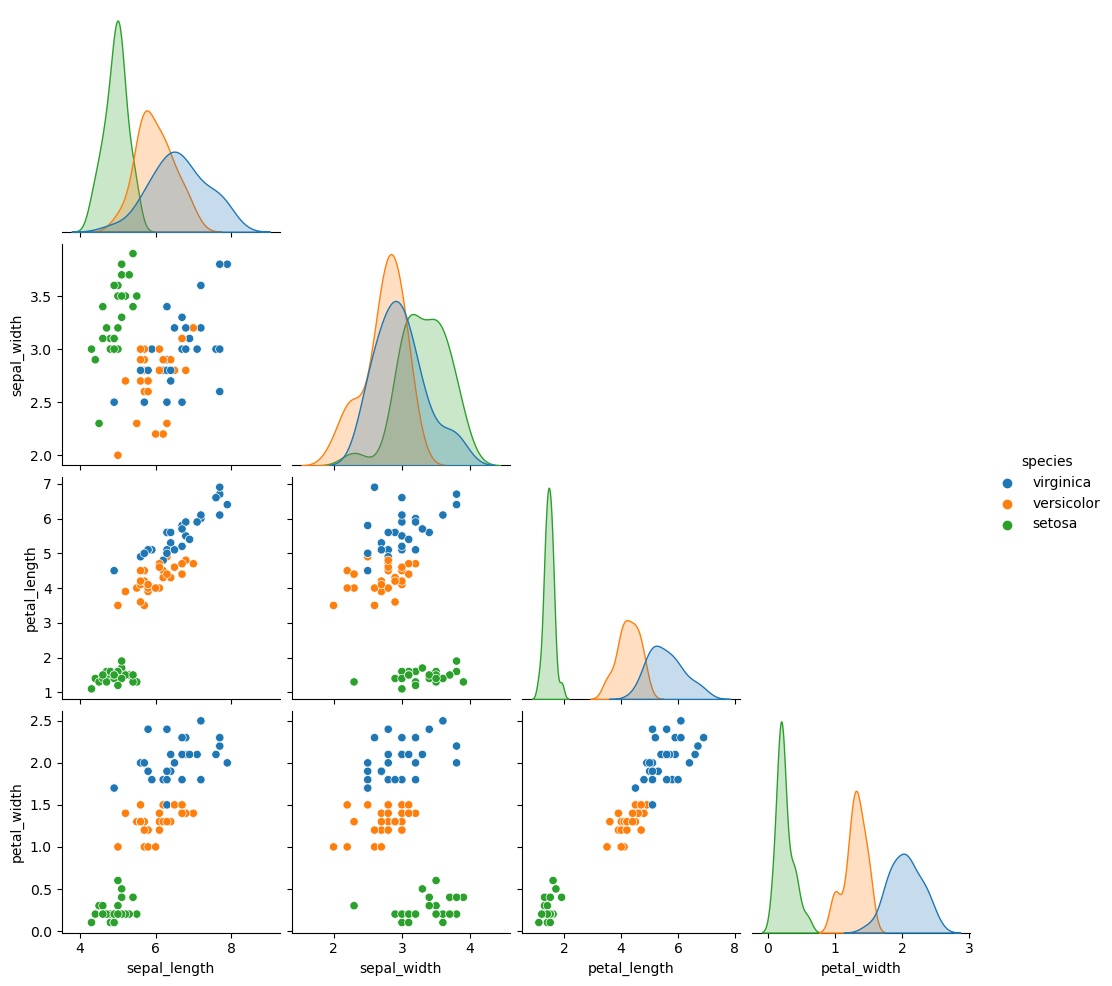

In [160]:
sns.pairplot(train_iris, vars = num_vars, hue='species', corner=True) # corner=True removes repitation

### Takeaways:

- petal_length and petal width can be used to distingush setosa from the otherr. 

- Setosa has the shortest petal_length and petal_width

- virginica has the longest petal_length and petal_width




- Visualize two numeric variables of the species. Hint: sns.relplot with hue or col

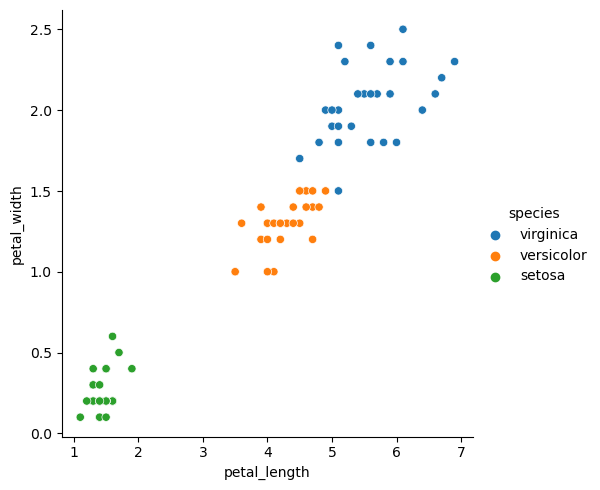

In [130]:
sns.relplot(x='petal_length', y='petal_width', hue='species', data=train_iris)

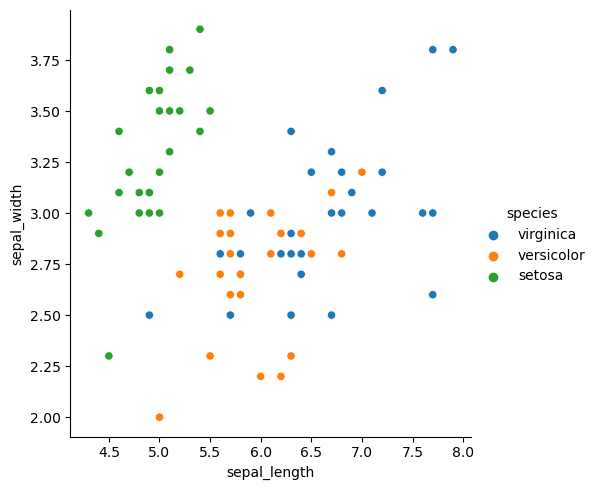

In [159]:
sns.relplot(x='sepal_length', y='sepal_width', hue='species', data=train_iris)

In [162]:
train_iris['sepal_area'] = train_iris.sepal_length * train_iris.sepal_width
train_iris['petal_area'] = train_iris.petal_length * train_iris.petal_width

In [167]:
train_iris.head()

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica,sepal_area,petal_area
131,virginica,7.9,3.8,6.4,2.0,0,1,30.02,12.80
59,versicolor,5.2,2.7,3.9,1.4,1,0,14.04,5.46
108,virginica,6.7,2.5,5.8,1.8,0,1,16.75,10.44
82,versicolor,5.8,2.7,3.9,1.2,1,0,15.66,4.68
40,setosa,5.0,3.5,1.3,0.3,0,0,17.50,0.39


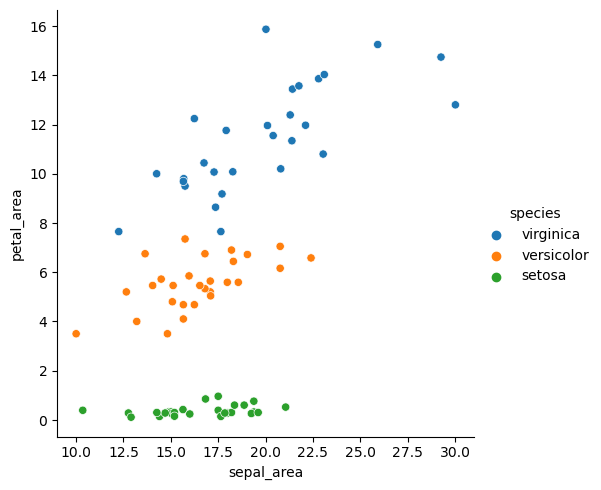

In [163]:
sns.relplot(x='sepal_area', y='petal_area', hue='species', data=train_iris)

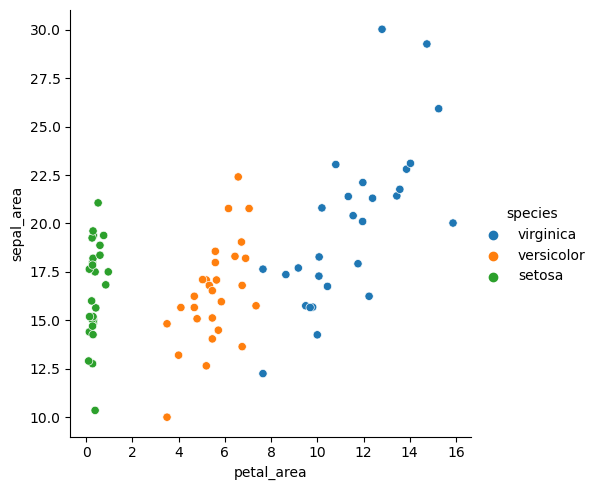

In [164]:
sns.relplot(x='petal_area', y='sepal_area', hue='species', data=train_iris)

- Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

In [170]:
melted = train_iris.melt(id_vars = ['species'], var_name='measure', value_name= 'values')
melted

,species,measure,values
0,virginica,sepal_length,7.90
1,versicolor,sepal_length,5.20
2,virginica,sepal_length,6.70
3,versicolor,sepal_length,5.80
4,setosa,sepal_length,5.00
...,...,...,...
667,versicolor,petal_area,5.72
668,versicolor,petal_area,4.68
669,virginica,petal_area,14.03
670,setosa,petal_area,0.15


In [172]:
melted.measure.value_counts()

sepal_length    84
sepal_width     84
petal_length    84
petal_width     84
versicolor      84
virginica       84
sepal_area      84
petal_area      84
Name: measure, dtype: int64

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 53.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 69.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categori

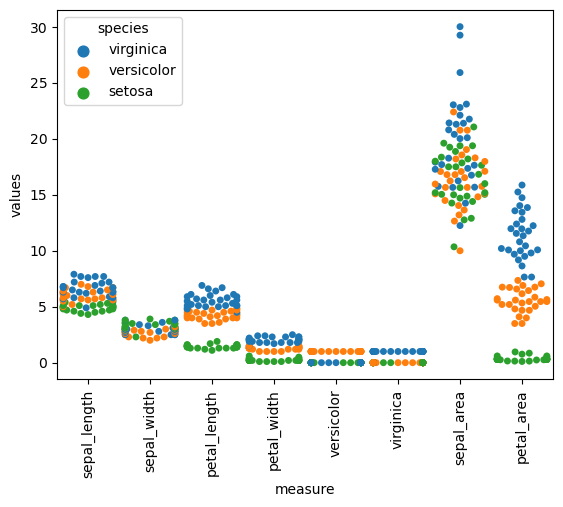

In [181]:

sns.swarmplot(x='measure', y='values', data=melted, hue='species')
plt.xticks(rotation=90)
plt.show()


- Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

In [132]:
train_setosa = train_iris[(train_iris.versicolor == 0) & (train_iris.virginica == 0)]
train_setosa

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
40,setosa,5.0,3.5,1.3,0.3,0,0
46,setosa,5.1,3.8,1.6,0.2,0,0
29,setosa,4.7,3.2,1.6,0.2,0,0
23,setosa,5.1,3.3,1.7,0.5,0,0
12,setosa,4.8,3.0,1.4,0.1,0,0
30,setosa,4.8,3.1,1.6,0.2,0,0
21,setosa,5.1,3.7,1.5,0.4,0,0
25,setosa,5.0,3.0,1.6,0.2,0,0
8,setosa,4.4,2.9,1.4,0.2,0,0
43,setosa,5.0,3.5,1.6,0.6,0,0


In [136]:
train_setosa_sepal_area = train_setosa.sepal_length * train_setosa.sepal_width
train_virginica_sepal_area = train_virginica.sepal_length * train_virginica.sepal_width

In [137]:
train_setosa_area= train_setosa_sepal_area.tolist()
train_virginica_area = train_virginica_sepal_area.tolist()

In [138]:
setosa_df = pd.DataFrame({'setosa': train_setosa_area, 'virginica': train_virginica_area})
setosa_df

,setosa,virginica
0,17.50,30.02
1,19.38,16.75
2,15.04,12.25
3,16.83,17.70
4,14.40,17.28
5,14.88,17.36
6,18.87,18.27
7,15.00,16.24
8,12.76,29.26
9,17.50,23.04


<AxesSubplot:>

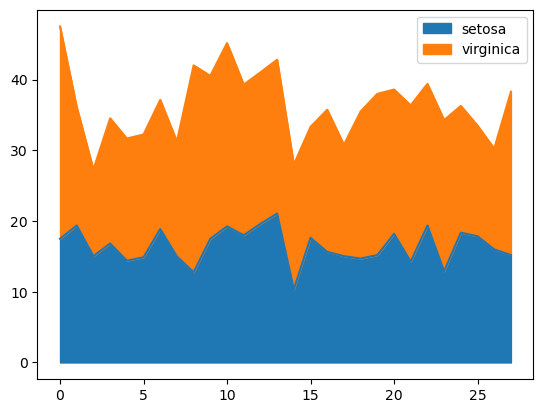

In [139]:
setosa_df.plot.area()

### Hypothesis

- $H_{O}$: Sepal area of virginica is not different than speal area of setosa

- $H_{a}$: sepal area of virginica is different than sepal area of setosa

In [122]:
# set alpha
alpha = 0.05


In [140]:
stat, p_value = mannwhitneyu(train_virginica_sepal_area, train_setosa_sepal_area)
stat, p_value

(592.0, 0.0010777670619209008)

In [141]:
# compare p_value:
if p_value < alpha:
    print("We Rejected Null Hypothesis")
else:
    print("We failed to reject Null Hypothesis")

We Rejected Null Hypothesis


### Takeaways: 

### Part II

- Explore your titanic dataset more completely.

- Determine drivers of the target variable

- Determine if certain columns should be dropped

- Determine if it would be valuable to bin some numeric columns

- Determine if it would be valuable to combine multiple columns into one.

- Does it make sense to combine any features?

- Do you find any surprises?

- Document any and all findings and takeaways in your notebook using markdown.

In [205]:
titanic = acquire.get_titanic_data()

In [206]:
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [207]:
titanic.shape

(891, 13)

In [208]:
titanic.isna().sum()

passenger_id      0
survived          0
pclass            0
sex               0
age             177
sibsp             0
parch             0
fare              0
embarked          2
class             0
deck            688
embark_town       2
alone             0
dtype: int64

In [209]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [210]:
titanic = titanic.drop(columns= ['passenger_id', 'age','class', 'embarked','deck' ])
titanic =titanic[~titanic['embark_town'].isna()]


In [211]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   pclass       889 non-null    int64  
 2   sex          889 non-null    object 
 3   sibsp        889 non-null    int64  
 4   parch        889 non-null    int64  
 5   fare         889 non-null    float64
 6   embark_town  889 non-null    object 
 7   alone        889 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 62.5+ KB


In [201]:
# clean_titanic = prepare.prep_titanic(titanic)

In [202]:
# clean_titanic.head()

In [212]:
train_titanic, validate_titanic, test_titanic = prepare.train_validate_test_split(titanic, 'survived')
train_titanic.shape, validate_titanic.shape, test_titanic.shape

((497, 8), (214, 8), (178, 8))

In [213]:
train_titanic.head()

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
780,1,3,female,0,0,7.2292,Cherbourg,1
754,1,2,female,1,2,65.0000,Southampton,0
292,0,2,male,0,0,12.8750,Cherbourg,1
149,0,2,male,0,0,13.0000,Southampton,1
169,0,3,male,0,0,56.4958,Southampton,1


In [226]:
for col in train_titanic.columns: 
    if col != 'fare':
        print(col)
        print(train_titanic[col].value_counts())
        print()

survived
0    307
1    190
Name: survived, dtype: int64

pclass
3    271
2    118
1    108
Name: pclass, dtype: int64

sex
male      321
female    176
Name: sex, dtype: int64

sibsp
0    344
1    114
2     13
4     10
3      9
8      4
5      3
Name: sibsp, dtype: int64

parch
0    379
1     61
2     50
5      3
4      3
6      1
Name: parch, dtype: int64

embark_town
Southampton    368
Cherbourg       91
Queenstown      38
Name: embark_town, dtype: int64

alone
1    305
0    192
Name: alone, dtype: int64



In [227]:
train_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497 entries, 780 to 249
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     497 non-null    int64  
 1   pclass       497 non-null    int64  
 2   sex          497 non-null    object 
 3   sibsp        497 non-null    int64  
 4   parch        497 non-null    int64  
 5   fare         497 non-null    float64
 6   embark_town  497 non-null    object 
 7   alone        497 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 34.9+ KB


In [255]:
cat_vars = ['pclass','sex', 'sibsp', 'parch', 'embark_town', 'alone']

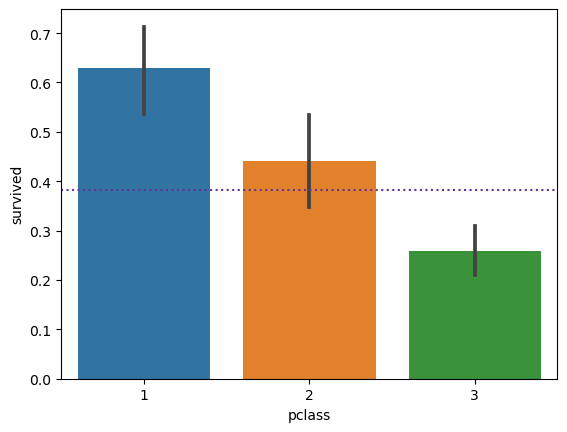

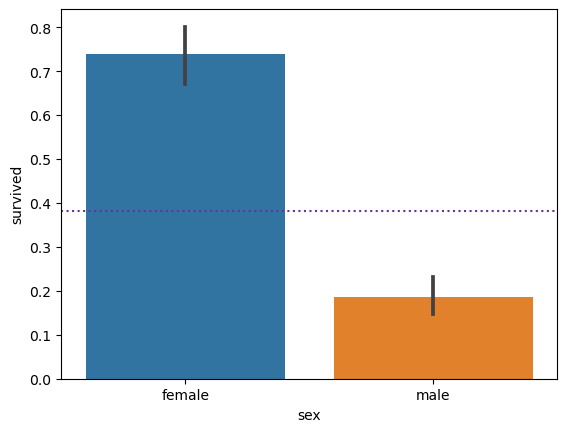

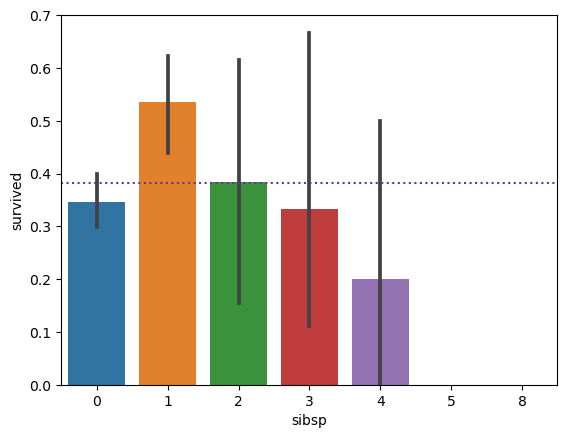

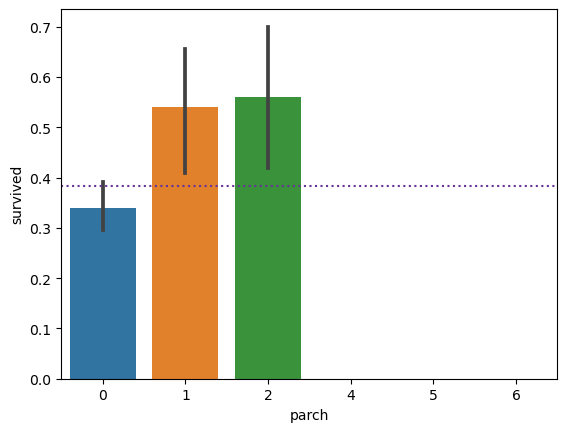

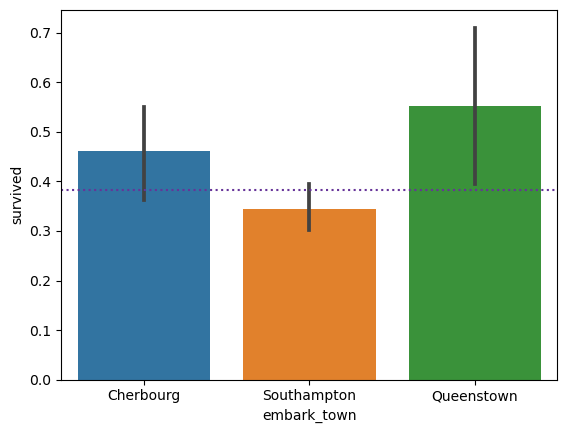

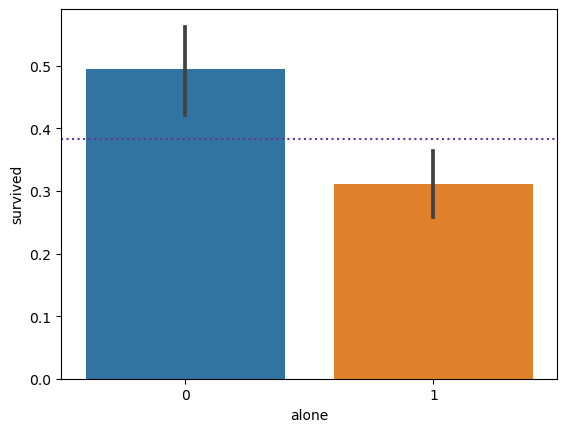

In [259]:
for col in cat_vars:
    sns.barplot(x=col, y='survived', data=train_titanic)
    survival_rate = train_titanic.survived.mean()
    plt.axhline(survival_rate, label='survival rate', color='rebeccapurple', linestyle='dotted')
    plt.show()

-----
### Part III

- Explore your telco data to discover drivers of churn

- Determine if certain columns should be dropped

- Determine if it would be valuable to bin some numeric columns

- Determine if it would be valuable to combine multiple columns into one.

- What are your drivers of churn?

- Does it make sense to combine any features?

- Do you find any surprises?

- Document any and all findings and takeaways in your notebook using markdown.

In [260]:
telco_initial_df = acquire.get_telco_data()
telco_initial_df.head()

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,2,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,DSL,One year,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,DSL,Month-to-month,Mailed check
2,1,1,2,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Fiber optic,Month-to-month,Electronic check
3,1,1,2,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Fiber optic,Month-to-month,Electronic check
4,2,1,2,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Fiber optic,Month-to-month,Mailed check


In [261]:
clean_telco_df = prepare.prep_telco(telco_initial_df)

In [262]:
clean_telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 48 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   object 
 1   senior_citizen                         7043 non-null   int64  
 2   partner                                7043 non-null   object 
 3   dependents                             7043 non-null   object 
 4   tenure                                 7043 non-null   int64  
 5   phone_service                          7043 non-null   object 
 6   multiple_lines                         7043 non-null   object 
 7   online_security                        7043 non-null   object 
 8   online_backup                          7043 non-null   object 
 9   device_protection                      7043 non-null   object 
 10  tech_support                           7043 non-null   object 
 11  stre

In [263]:
clean_telco_df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,internet_service_type_Fiber optic,internet_service_type_None,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,...,0,1,0,0,0,1,0,0,0,1
1,Male,0,No,No,9,Yes,Yes,No,No,No,...,1,0,0,0,0,0,0,0,0,1
2,Male,0,No,No,4,Yes,No,No,No,Yes,...,0,1,1,1,0,0,0,0,1,0
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,...,1,1,1,1,0,0,0,0,1,0
4,Female,1,Yes,No,3,Yes,No,No,No,No,...,0,1,1,1,0,0,0,0,0,1


In [264]:
to_drop = ['gender', 'senior_citizen', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'internet_service_type', 'contract_type', 'payment_type']
    

In [265]:
clean_telco.drop(columns = to_drop, inplace=True)

In [266]:
clean_telco.head()

,tenure,monthly_charges,total_charges,churn,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,internet_service_type_Fiber optic,internet_service_type_None,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,9,65.6,593.30,No,0,1,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
1,9,59.9,542.40,No,1,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
2,4,73.9,280.85,Yes,1,0,0,1,0,0,...,0,1,1,1,0,0,0,0,1,0
3,13,98.0,1237.85,Yes,1,1,0,1,0,0,...,1,1,1,1,0,0,0,0,1,0
4,3,83.9,267.40,Yes,0,1,0,1,0,0,...,0,1,1,1,0,0,0,0,0,1


In [267]:
clean_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7043 non-null   int64  
 1   monthly_charges                        7043 non-null   float64
 2   total_charges                          7043 non-null   float64
 3   churn                                  7043 non-null   object 
 4   gender_Male                            7043 non-null   uint8  
 5   partner_Yes                            7043 non-null   uint8  
 6   dependents_Yes                         7043 non-null   uint8  
 7   phone_service_Yes                      7043 non-null   uint8  
 8   multiple_lines_No phone service        7043 non-null   uint8  
 9   multiple_lines_Yes                     7043 non-null   uint8  
 10  online_security_No internet service    7043 non-null   uint8  
 11  onli

In [268]:
clean_telco.isna().sum()

tenure                                   0
monthly_charges                          0
total_charges                            0
churn                                    0
gender_Male                              0
partner_Yes                              0
dependents_Yes                           0
phone_service_Yes                        0
multiple_lines_No phone service          0
multiple_lines_Yes                       0
online_security_No internet service      0
online_security_Yes                      0
online_backup_No internet service        0
online_backup_Yes                        0
device_protection_No internet service    0
device_protection_Yes                    0
tech_support_No internet service         0
tech_support_Yes                         0
streaming_tv_No internet service         0
streaming_tv_Yes                         0
streaming_movies_No internet service     0
streaming_movies_Yes                     0
paperless_billing_Yes                    0
churn_Yes  

In [269]:
clean_telco.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
monthly_charges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
total_charges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80
gender_Male,7043.0,0.504756,0.500013,0.00,0.00,1.00,1.00,1.00
partner_Yes,7043.0,0.483033,0.499748,0.00,0.00,0.00,1.00,1.00
dependents_Yes,7043.0,0.299588,0.458110,0.00,0.00,0.00,1.00,1.00
phone_service_Yes,7043.0,0.903166,0.295752,0.00,1.00,1.00,1.00,1.00
multiple_lines_No phone service,7043.0,0.096834,0.295752,0.00,0.00,0.00,0.00,1.00
multiple_lines_Yes,7043.0,0.421837,0.493888,0.00,0.00,0.00,1.00,1.00
online_security_No internet service,7043.0,0.216669,0.412004,0.00,0.00,0.00,0.00,1.00


In [270]:
num_vars = ['tenure', 'monthly_charges', 'total_charges']

In [271]:
cat_vars = clean_telco.loc[:, ~clean_telco.columns.isin(['tenure', 'monthly_charges', 'total_charges'])]

In [272]:
cat_vars

,churn,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,internet_service_type_Fiber optic,internet_service_type_None,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,No,0,1,1,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,No,1,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,Yes,1,0,0,1,0,0,0,0,0,...,0,1,1,1,0,0,0,0,1,0
3,Yes,1,1,0,1,0,0,0,0,0,...,1,1,1,1,0,0,0,0,1,0
4,Yes,0,1,0,1,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
7039,Yes,1,1,0,1,0,1,0,0,0,...,1,1,1,1,0,0,0,0,1,0
7040,No,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
7041,No,1,1,1,1,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1


In [273]:
train_telco, validate_telco, test_telco = prepare.train_validate_test_split(clean_telco, 'churn')
train_telco.shape, validate_telco.shape, test_telco.shape

((3943, 31), (1691, 31), (1409, 31))

churn
No     2897
Yes    1046
Name: churn, dtype: int64
No     73.471976
Yes    26.528024
Name: churn, dtype: float64


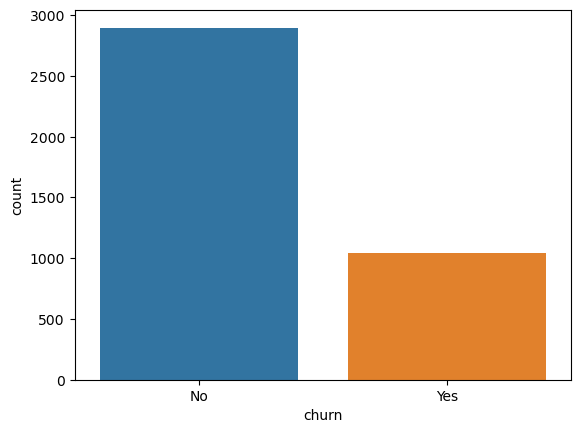

gender_Male
1    1993
0    1950
Name: gender_Male, dtype: int64
1    50.54527
0    49.45473
Name: gender_Male, dtype: float64


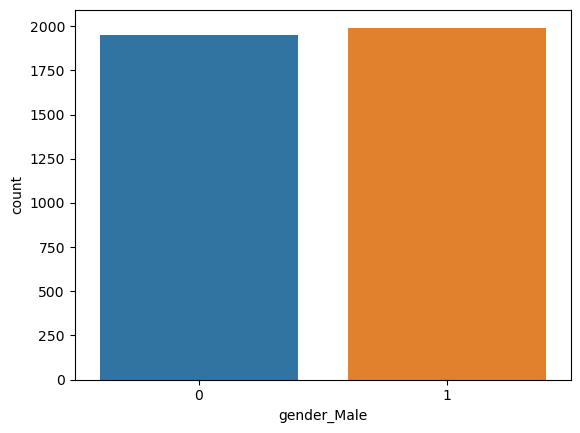

partner_Yes
0    2051
1    1892
Name: partner_Yes, dtype: int64
0    52.016231
1    47.983769
Name: partner_Yes, dtype: float64


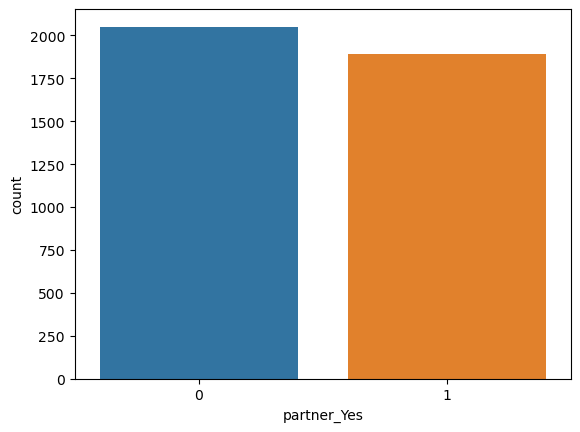

dependents_Yes
0    2744
1    1199
Name: dependents_Yes, dtype: int64
0    69.591681
1    30.408319
Name: dependents_Yes, dtype: float64


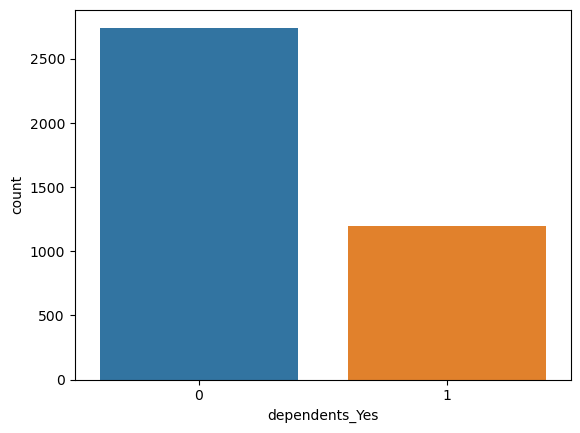

phone_service_Yes
1    3582
0     361
Name: phone_service_Yes, dtype: int64
1    90.844535
0     9.155465
Name: phone_service_Yes, dtype: float64


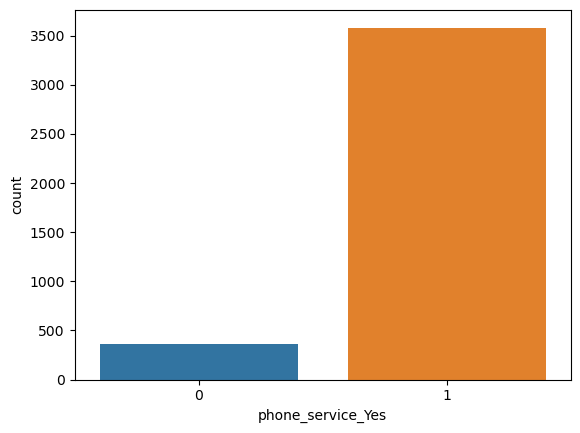

multiple_lines_No phone service
0    3582
1     361
Name: multiple_lines_No phone service, dtype: int64
0    90.844535
1     9.155465
Name: multiple_lines_No phone service, dtype: float64


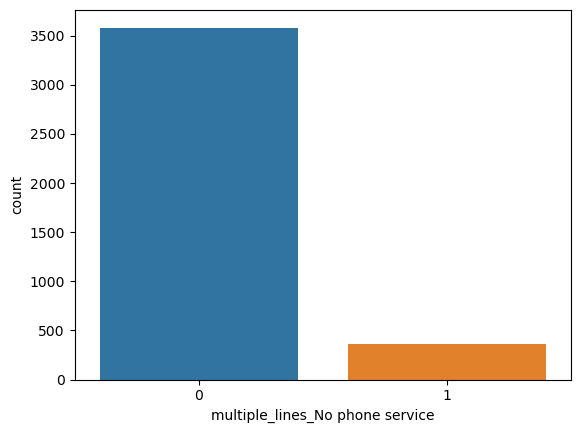

multiple_lines_Yes
0    2270
1    1673
Name: multiple_lines_Yes, dtype: int64
0    57.570378
1    42.429622
Name: multiple_lines_Yes, dtype: float64


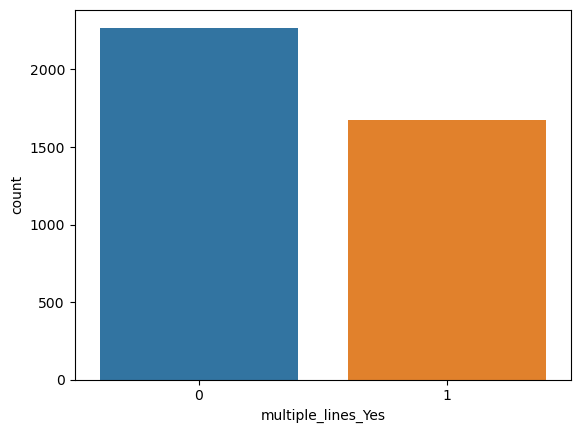

online_security_No internet service
0    3101
1     842
Name: online_security_No internet service, dtype: int64
0    78.645701
1    21.354299
Name: online_security_No internet service, dtype: float64


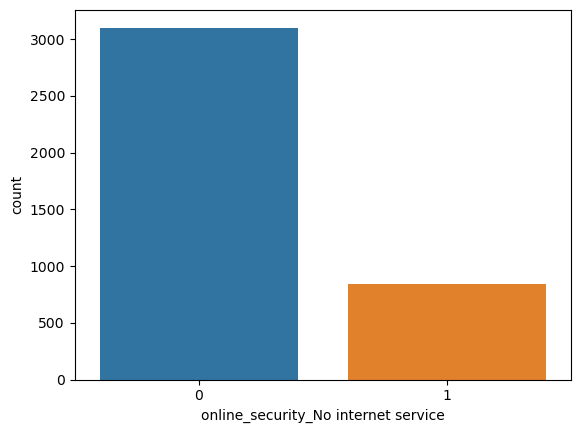

online_security_Yes
0    2805
1    1138
Name: online_security_Yes, dtype: int64
0    71.138727
1    28.861273
Name: online_security_Yes, dtype: float64


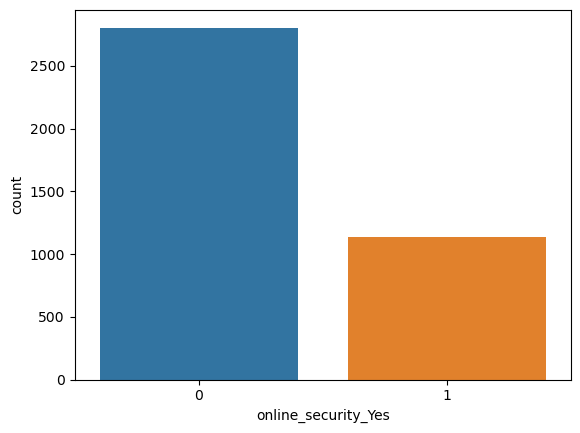

online_backup_No internet service
0    3101
1     842
Name: online_backup_No internet service, dtype: int64
0    78.645701
1    21.354299
Name: online_backup_No internet service, dtype: float64


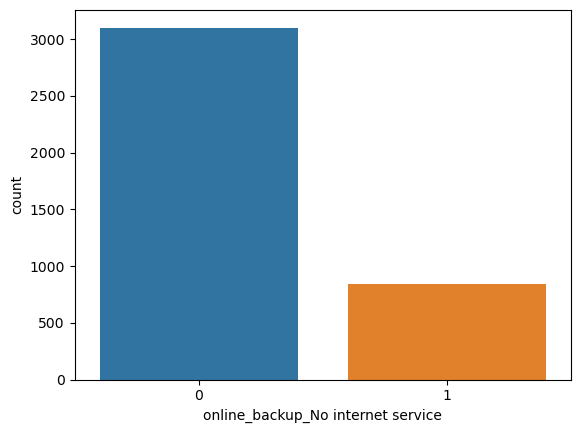

online_backup_Yes
0    2578
1    1365
Name: online_backup_Yes, dtype: int64
0    65.381689
1    34.618311
Name: online_backup_Yes, dtype: float64


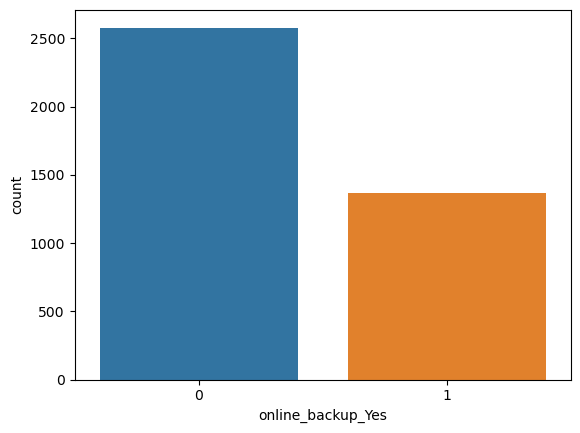

device_protection_No internet service
0    3101
1     842
Name: device_protection_No internet service, dtype: int64
0    78.645701
1    21.354299
Name: device_protection_No internet service, dtype: float64


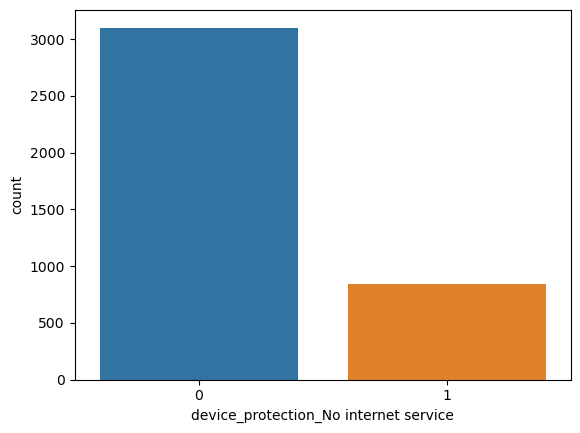

device_protection_Yes
0    2576
1    1367
Name: device_protection_Yes, dtype: int64
0    65.330966
1    34.669034
Name: device_protection_Yes, dtype: float64


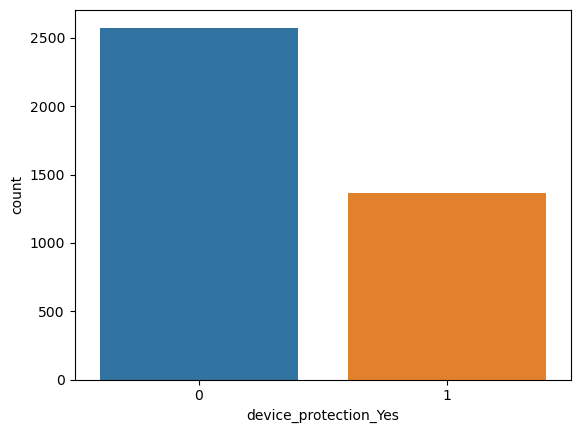

tech_support_No internet service
0    3101
1     842
Name: tech_support_No internet service, dtype: int64
0    78.645701
1    21.354299
Name: tech_support_No internet service, dtype: float64


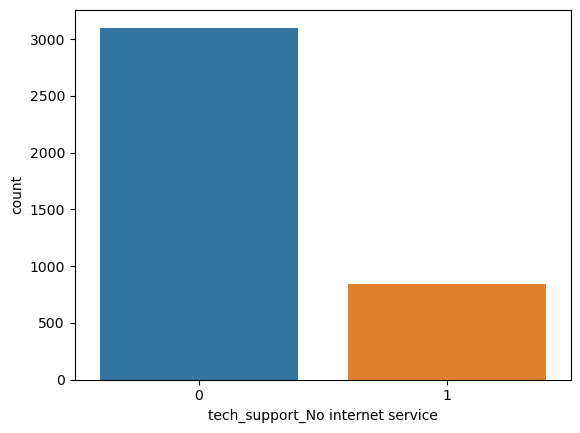

tech_support_Yes
0    2782
1    1161
Name: tech_support_Yes, dtype: int64
0    70.555415
1    29.444585
Name: tech_support_Yes, dtype: float64


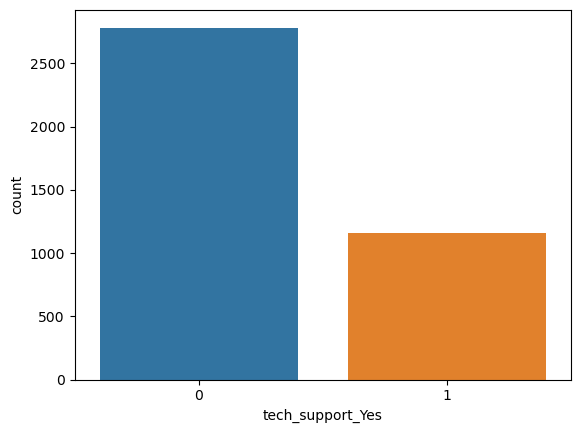

streaming_tv_No internet service
0    3101
1     842
Name: streaming_tv_No internet service, dtype: int64
0    78.645701
1    21.354299
Name: streaming_tv_No internet service, dtype: float64


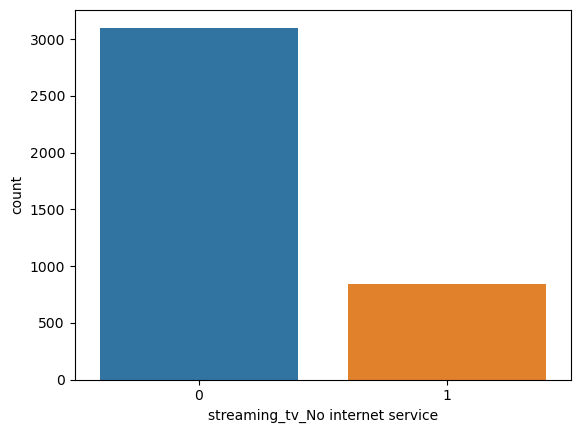

streaming_tv_Yes
0    2389
1    1554
Name: streaming_tv_Yes, dtype: int64
0    60.588384
1    39.411616
Name: streaming_tv_Yes, dtype: float64


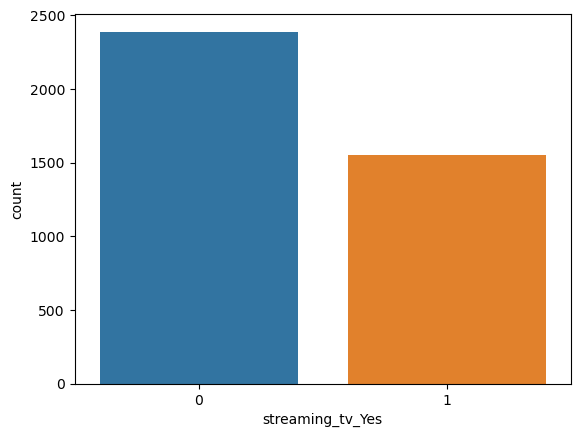

streaming_movies_No internet service
0    3101
1     842
Name: streaming_movies_No internet service, dtype: int64
0    78.645701
1    21.354299
Name: streaming_movies_No internet service, dtype: float64


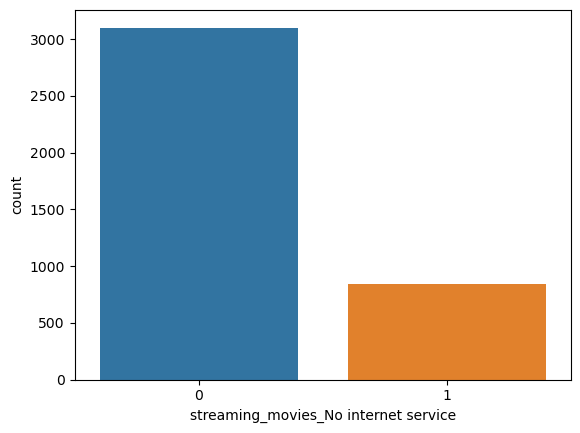

streaming_movies_Yes
0    2382
1    1561
Name: streaming_movies_Yes, dtype: int64
0    60.410855
1    39.589145
Name: streaming_movies_Yes, dtype: float64


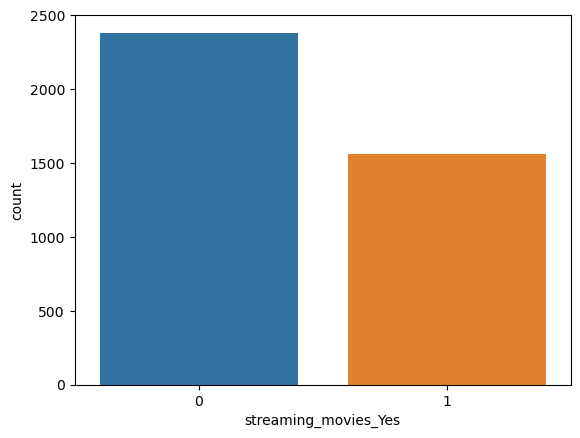

paperless_billing_Yes
1    2388
0    1555
Name: paperless_billing_Yes, dtype: int64
1    60.563023
0    39.436977
Name: paperless_billing_Yes, dtype: float64


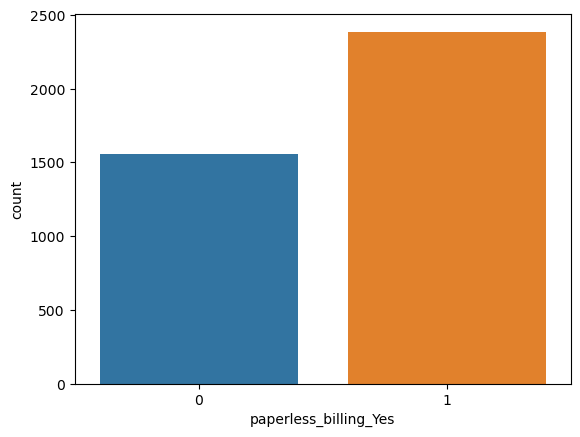

churn_Yes
0    2897
1    1046
Name: churn_Yes, dtype: int64
0    73.471976
1    26.528024
Name: churn_Yes, dtype: float64


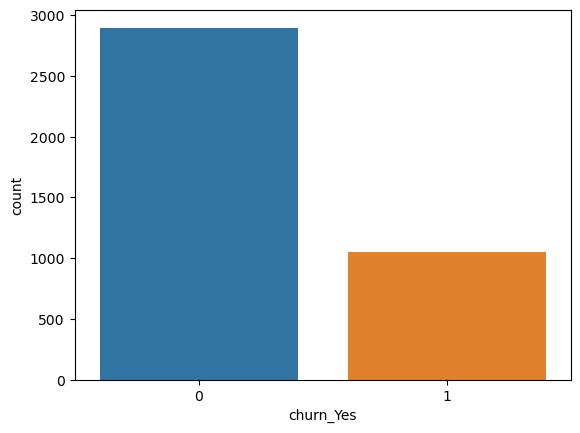

internet_service_type_Fiber optic
0    2175
1    1768
Name: internet_service_type_Fiber optic, dtype: int64
0    55.161045
1    44.838955
Name: internet_service_type_Fiber optic, dtype: float64


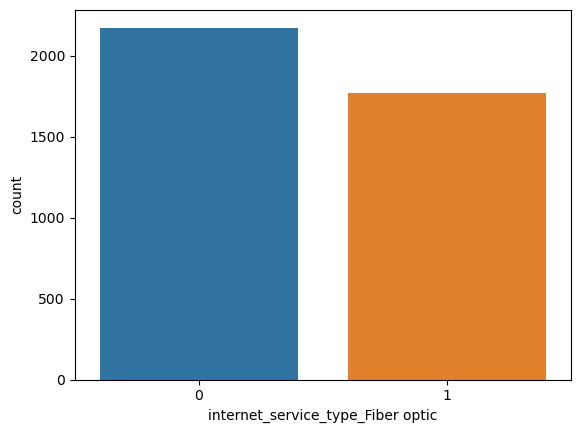

internet_service_type_None
0    3101
1     842
Name: internet_service_type_None, dtype: int64
0    78.645701
1    21.354299
Name: internet_service_type_None, dtype: float64


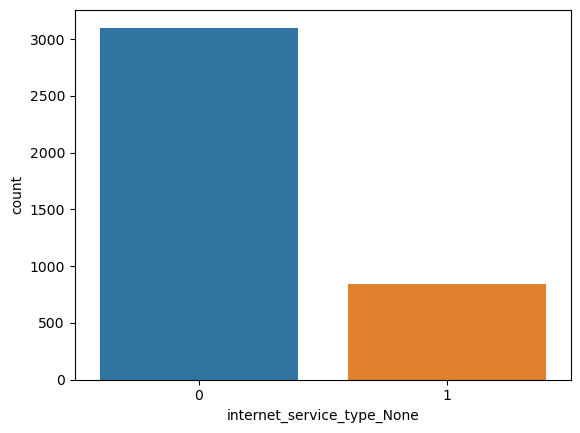

contract_type_One year
0    3139
1     804
Name: contract_type_One year, dtype: int64
0    79.609434
1    20.390566
Name: contract_type_One year, dtype: float64


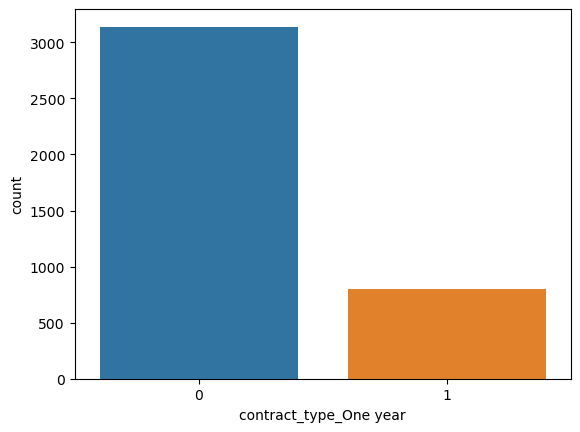

contract_type_Two year
0    2976
1     967
Name: contract_type_Two year, dtype: int64
0    75.475526
1    24.524474
Name: contract_type_Two year, dtype: float64


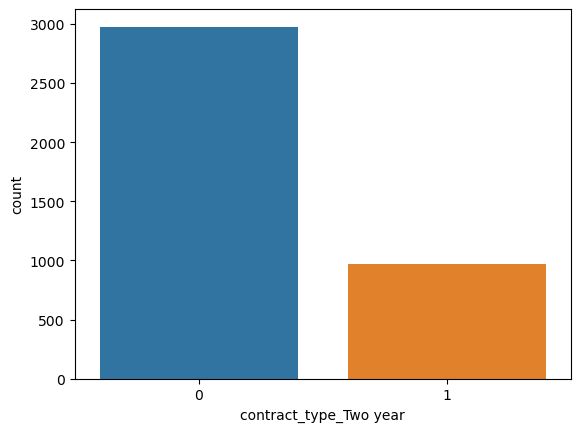

payment_type_Credit card (automatic)
0    3076
1     867
Name: payment_type_Credit card (automatic), dtype: int64
0    78.011666
1    21.988334
Name: payment_type_Credit card (automatic), dtype: float64


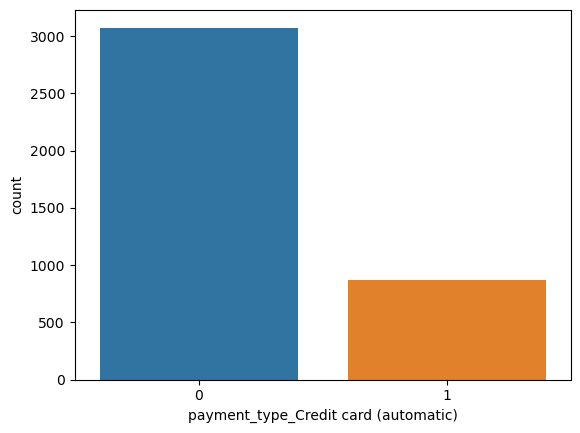

payment_type_Electronic check
0    2630
1    1313
Name: payment_type_Electronic check, dtype: int64
0    66.700482
1    33.299518
Name: payment_type_Electronic check, dtype: float64


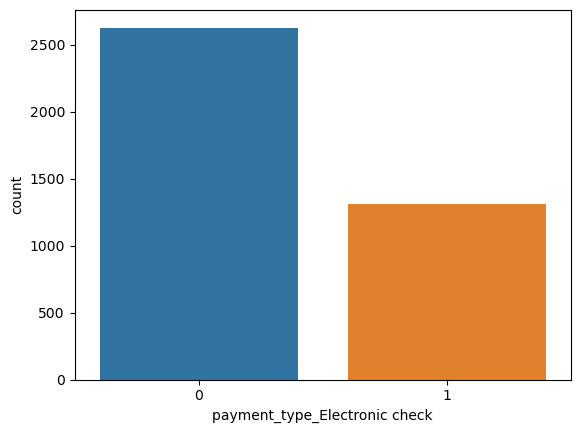

payment_type_Mailed check
0    3062
1     881
Name: payment_type_Mailed check, dtype: int64
0    77.656607
1    22.343393
Name: payment_type_Mailed check, dtype: float64


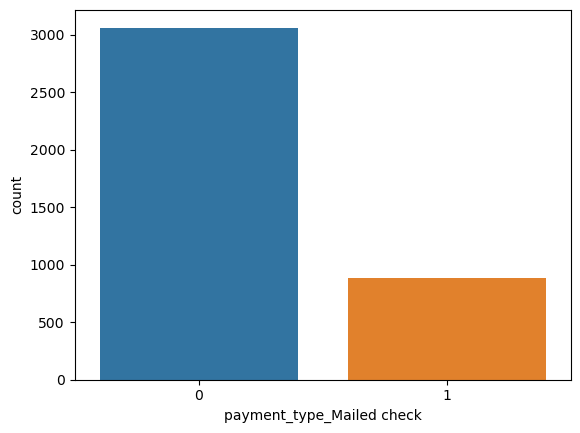

In [274]:
for col in cat_vars:
    print(col)
    print(train_telco[col].value_counts())
    print(train_telco[col].value_counts(normalize=True)*100)
    sns.countplot(x=col, data=train_telco)
    plt.show()

tenure


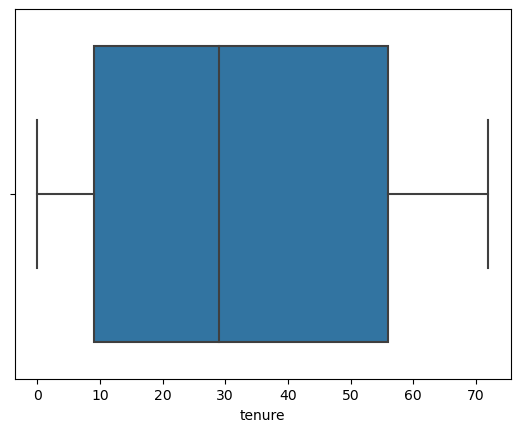

monthly_charges


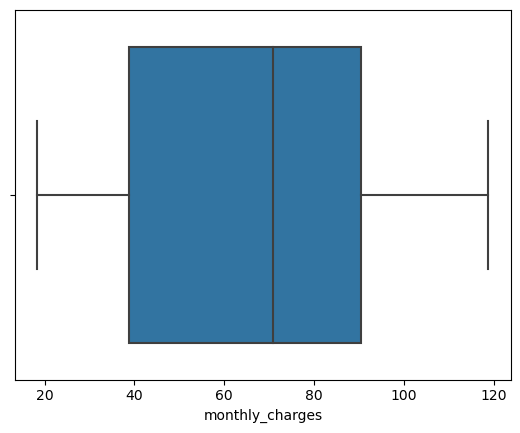

total_charges


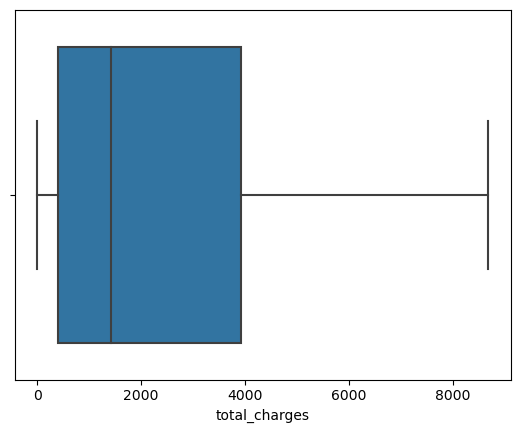

In [275]:
for col in num_vars:
    print(col)
    sns.boxplot(x=col, data=train_telco)
    plt.show()

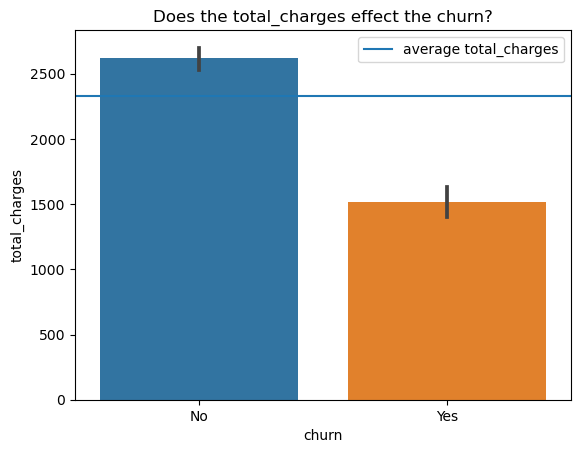

In [276]:
plt.title('Does the total_charges effect the churn?')
sns.barplot(y='total_charges', x='churn', data=train_telco)
total_charges_rate = train_telco.total_charges.mean()
plt.axhline(total_charges_rate, label = 'average total_charges')
plt.legend()

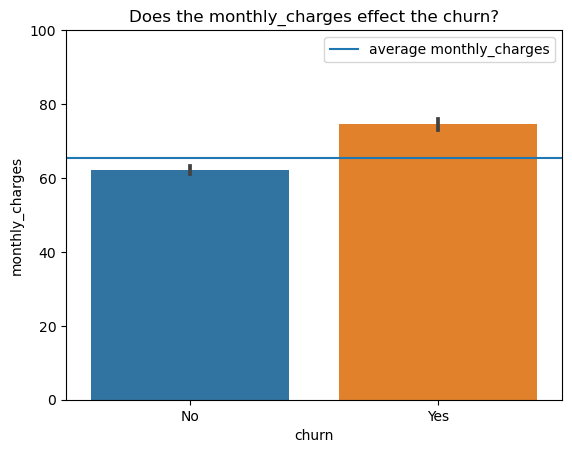

In [277]:
plt.title('Does the monthly_charges effect the churn?')
sns.barplot(y='monthly_charges', x='churn', data=train_telco)
plt.ylim(0,100)
monthly_charges_rate = train_telco.monthly_charges.mean()
plt.axhline(monthly_charges_rate, label = 'average monthly_charges')
plt.legend()

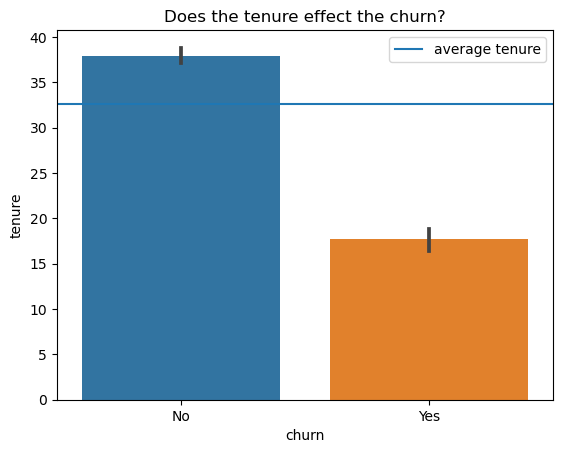

In [278]:
plt.title('Does the tenure effect the churn?')
sns.barplot(y='tenure', x='churn', data=train_telco)
tenure_rate = train_telco.tenure.mean()
plt.axhline(tenure_rate, label = 'average tenure')
plt.legend()

In [ ]:
train.head()